# Data Science I
### Klausur I im Sommersemester 2024

## Allgemeine Informationen

* Sie haben eine Woche Zeit, um die Klausur zu bearbeiten.

* Sie können alle Quellen verwenden, müssen sie jedoch korrekt benennen. Wenn Sie ChatGPT oder eine ähnliche Software verwenden, müssen Sie dies kenntlich machen und den verwendeten Prompt angeben.

* Sie sollten die folgenden Pakete verwenden: `numpy, pandas, scipy, geopy, scikit-learn/sklearn, matplotlib, seborn, openPyxl` und Pythons Standardlibraries. Diese sind ausreichend, um die Klausur zu lösen. Falls Sie andere Pakete verwenden, rechtfertigen Sie deren Verwendung.

* Der Code muss ausreichend kommentiert und verständlich sein. Schreiben Sie Funktionen beim Wiederverwenden von Code. Befolgen Sie im Allgemeinen die Richtlinien aus der Vorlesung. Punkte können aufgrund eines schlecht strukturierten oder unverständlichen Codes abgezogen werden.

* **Begründen Sie Entscheidungen** zur Auswahl von Plots, Hypothesentest usw. und **interpretieren Sie** Ihre Ergebnisse.

* Sie dürfen in keiner Form Hilfe oder Rat von Dritten in Anspruch nehmen.

* Bitte laden Sie Ihre vollständige Lösung der Klausur als `.zip`-Datei mit dem Dateinamen `vorname_matrikelnummer.zip` bis 8. August 2024 um 12:00 Uhr auf StudIP in den Ordner `Submission - Exam 1` hoch.

* Fügen Sie der `.zip` Datei auch die unterschriebene Eigenständigkeitserklärung hinzu.

* Wenn Sie Fragen haben, kontaktieren Sie uns bitte rechtzeitig über Rocketchat.

In [503]:
# IMPORT LIBRARIES
import numpy as np, pandas as pd, geopy, sklearn, matplotlib.pyplot as plt, seaborn, openpyxl, warnings, os, dsplotter
from scipy.stats import ttest_ind

warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

#import numpy, pandas, scipy, geopy, sklearn, matplotlib, seaborn, openPyxl, scikit-learn

In [447]:
debug = True

## Aufgaben und Punkte:

<table>
  <thead>
    <tr>
      <th colspan="3">Aufgabe 1 - Data Preprocessing</th>
      <th colspan="2">Aufgabe 2 - Plotting</th>
      <th colspan="2">Aufgabe 3 - Statistics</th>
      <th colspan="2">Aufgabe 4 - Machine Learning </th>
    </tr>
    <tr>
      <th>Aufgabe 1.1</th>
      <th>Aufgabe 1.2</th>
      <th>Aufgabe 1.3</th>
      <th>Aufgabe 2.1</th>
      <th>Aufgabe 2.2</th>
      <th>Aufgabe 3.1</th>
      <th>Aufgabe 3.2</th>
      <th>Aufgabe 4.1</th>
      <th>Aufgabe 4.2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>10 Punkte </td>
      <td>12 Punkte </td>
      <td>2 Punkte </td>
      <td>11 Punkte</td>
      <td>27 Punkte </td>
      <td>13 Punkte </td>
      <td>5 Punkte </td>
      <td>10 Punkte </td>
      <td>10 Punkte </td>
    </tr>
    <!-- Add more rows as needed -->
  </tbody>
</table>


_____
## Aufgabe 0: Setup

Der Klausurordner enthält ein `Dockerfile`, in dem alle relevanten Pakete definiert sind. Das `Dockerfile` baut auf dem Jupyter Server Image auf. Verwenden Sie dieses Dockerfile, um zuerst ein Docker Image zu erstellen und dann einen Docker Container von diesem Image zu starten. Benutzen Sie anschließend die Jupyter Server Instanz, um an der Klausur zu arbeiten. Wir empfehlen dringend, die Docker-Umgebung zu verwenden, um Versionskonflikte zwischen den verschiedenen Paketen zu vermeiden. Code, der in dieser Umgebung nicht ausführbar ist, wird als **nicht funktional** bewertet.

____
## Aufgabe 1: Data Preprocessing (24 Punkte)

### Datenbeschreibung

Im Ordner `data` finden Sie die monatlichen Parkdaten der Stadt Göttingen für das Jahr 2023 (Feb.-Dez.). Die Parkschein-Verkäufe an den stationären Parkscheinautomaten befinden sich in den Dateien, deren Namen mit `Cale` beginnt, und die mit der Parkster-App gekauften Parkscheine befinden sich in den Dateien, deren Namen mit `Parkster` beginnen.<br>
Die Datei `parkzone_latlong.csv` enthält weitere geografische Informationen zu den Parkzonen und die Datei `psa_latlong.csv` enthält geografische Informationen über die Parkscheinautomaten innerhalb der Parkzone.

Die bereitgestellten Parkdaten sind echte Rohdaten und stammen direkt von der Stadt Göttingen. Wir haben lediglich die geografischen Informationen hinzugefügt.

*Bitte beachten Sie:*
- *Obwohl wir nur Daten von Februar bis Dezember haben, bezeichnen wir diese im Folgenden als jährlich.*
- *Aufgrund der Größe der Daten sollten Sie Ihren Arbeitsspeicher effizient verwenden. Vermeiden Sie daher die Speicherung mehrerer Kopien desselben DataFrames.*

#### Aufagbe 1.1 - Laden der Daten (10 Punkte)
Laden Sie die Dateien für die Parkscheinautomaten (`Cale-*`) und für die App (`Parkster-*`) und fügen Sie diese **jeweils** zu einem Dataframe zusammen, der die jährlichen Verkäufe für Parkscheinautomaten und App beinhaltet. <br>
Laden Sie auch die weiteren Informationen zu den Parkscheinautomaten (`psa_latlong.csv`) und Parkzonen (` parkzones_latlong.csv`).

Sie werden die Werte `0` und `999` in der Spalte `Automaten -ID` für die Daten der Parkscheinautomaten finden. <br> Ändern Sie die `0`en in `1`en und löschen Sie alle Einträge mit `999`.
Überprüfen Sie auch auf Zeilen-Duplikate und löschen Sie diese gegebenenfalls. 

##### Load Automaten

In [448]:
# Load data for Parkscheinautomaten
print("automaten starts")
automaten_files = list(filter(lambda x: x.startswith('Cale-'), os.listdir('data')))
automaten_df = pd.concat([pd.read_excel(f"data/{file}", skiprows=2) for file in automaten_files])
print("automaten finish\n----------------")

if debug: print(automaten_df)

automaten starts
automaten finish
----------------
      Automat - Automaten ID Zahleinheit - Name     Knoten  \
0                       PA22              Münze  Göttingen   
1                       PA18              Münze  Göttingen   
2                       PA76              Münze  Göttingen   
3                       PA67              Münze  Göttingen   
4                       PA75              Münze  Göttingen   
...                      ...                ...        ...   
60723                   PA12              Münze  Göttingen   
60724                   PA94              Münze  Göttingen   
60725                   PA27              Münze  Göttingen   
60726                   PA22              Münze  Göttingen   
60727                   PA27              Münze  Göttingen   

           Kaufdatum Lokal  Betrag Artikelname  Artikel ID Tarifpaket - Name  \
0      01.06.2023 00:24:24     6.0  Parkticket           0      Normalticket   
1      01.06.2023 00:27:39     4.2  Parktick

In [449]:
# remote PA and convert number to int -> easier replacement + easier connection in task 1b
automaten_df['Automat - Automaten ID'] = automaten_df['Automat - Automaten ID'].str.replace("PA", "").astype(int)

##### Load App

In [450]:
# Load data for App
print("app start")
app_files = list(filter(lambda x: x.startswith('Parkster-'), os.listdir('data')))
app_df = pd.concat([pd.read_excel(f"data/{file}") for file in app_files])
app_df['Parkgebühren inkl. MwSt. in EUR'] = app_df['Parkgebühren inkl. MwSt. in EUR'].str.replace(',', '.').astype(float) # to compare floats
print("app finish\n----------------")

if debug: print(app_df)

app start
app finish
----------------
       Parkzone             Erstellt                Start  \
0         37010  2023-02-28 08:00:27  2023-02-28 08:00:27   
1         37010  2023-02-28 09:29:55  2023-02-28 09:29:55   
2         37010  2023-02-28 15:18:57  2023-02-28 15:18:57   
3         37005  2023-02-28 16:38:33  2023-02-28 16:38:33   
4         37005  2023-02-28 16:45:17  2023-02-28 16:45:17   
...         ...                  ...                  ...   
32829     37108  2023-05-31 19:39:53  2023-05-31 19:39:53   
32830     37204  2023-05-31 19:46:03  2023-05-31 19:46:03   
32831     37104  2023-05-31 19:58:45  2023-05-31 19:58:45   
32832     37001  2023-05-31 22:29:05  2023-05-31 22:29:05   
32833     37001  2023-05-31 22:33:09  2023-05-31 22:33:09   

                     Stopp  Parkgebühren inkl. MwSt. in EUR     Status  \
0      2023-03-01 00:00:27                             4.00     normal   
1      2023-03-01 09:29:55                             4.00     normal   
2      

##### Load Parkscheinautomaten

In [451]:
# Load data for Parkscheinautomaten information
print("Parkscheinautomaten start")
psa_info_df = pd.read_csv('data/psa_latlong.csv')
print("Parkscheinautomaten finish\n----------------")

if debug: print(psa_info_df)

Parkscheinautomaten start
Parkscheinautomaten finish
----------------
       PSA                 location   latitude  longitude   zone
0        1           Am Geismar Tor  51.529542   9.939956  37101
1    1 - 2           Am Geismar Tor  51.529542   9.939956  37101
2        2             Bürgerstraße  51.533104   9.926817  37102
3        3                Papendiek  51.533827   9.931693  37001
4        4       Bonifatiusschule -  51.528850   9.936085  37209
..     ...                      ...        ...        ...    ...
199    358          Kreuzbergring 2  51.542319   9.932972  37008
200    359          Kreuzbergring 3  51.542898   9.933473  37008
201    360  Von - Siebold- Straße 1  51.545994   9.943523  37008
202    361  Von - Siebold- Straße 2  51.546472   9.943674  37008
203    362  Von - Siebold- Straße 3  51.545665   9.942838  37008

[204 rows x 5 columns]


##### Load Parkzonen

In [452]:
# Load data for Parkzonen information
print("Parkzonen start")
parkzone_info_df = pd.read_csv('data/parkzones_latlong.csv')
print("Parkzonen finish\n----------------")
if debug: print(parkzone_info_df)

Parkzonen start
Parkzonen finish
----------------
     latitude  longitude  Zonencode  \
0   51.534248   9.936501      37001   
1   51.531270   9.936706      37005   
2   51.541762   9.942282      37008   
3   51.541249   9.944294      37009   
4   51.553603   9.942338      37010   
5   51.529542   9.939956      37101   
6   51.533104   9.926817      37102   
7   51.534678   9.942051      37103   
8   51.536634   9.932465      37104   
9   51.529205   9.933063      37105   
10  51.530127   9.937980      37106   
11  51.531365   9.927962      37107   
12  51.536733   9.928201      37108   
13  51.537675   9.930298      37109   
14  51.533859   9.943545      37201   
15  51.528115   9.940574      37202   
16  51.528164   9.940557      37203   
17  51.540630   9.935538      37204   
18  51.537585   9.940781      37205   
19  51.541593   9.937814      37206   
20  51.528780   9.931563      37207   
21  51.532833   9.935181      37208   
22  51.528850   9.936085      37209   

             

##### Remove and replace Automaten-IDs

In [453]:
# Change 0s to 1s in Automaten -ID column
automaten_df['Automat - Automaten ID'] = automaten_df['Automat - Automaten ID'].replace(0, 1)

In [454]:
# Drop entry with id 999
automaten_df = automaten_df[automaten_df['Automat - Automaten ID'] != 999]

In [455]:
# Check for and drop duplicate rows
automaten_df = automaten_df.drop_duplicates()
app_df = app_df.drop_duplicates()

In [456]:
if debug:
    print(automaten_df.columns)
    print(app_df.columns)

Index(['Automat - Automaten ID', 'Zahleinheit - Name', 'Knoten',
       'Kaufdatum Lokal', 'Betrag', 'Artikelname', 'Artikel ID',
       'Tarifpaket - Name', 'Maskierter PAN', 'Transaktionsreferenz',
       'Ticket Nummer'],
      dtype='object')
Index(['Parkzone', 'Erstellt', 'Start', 'Stopp',
       'Parkgebühren inkl. MwSt. in EUR', 'Status', 'Parkscheinart',
       'Zonencode', 'Eigentümercode'],
      dtype='object')


#### Aufgabe 1.2 - Zusammenführen und Formatieren (12 Punkte)
Erstellen Sie einen DataFrame für beide Verkaufsarten, indem Sie die beiden zuvor erstellen DataFrames zusammenführen. Nutzen Sie dazu die Parkzonen Informationen *(in `parkzones_latlong.csv`)* und die Parkscheinautomatennummer *(in` pa_latlong.csv`)*. Stellen Sie sicher, dass sich in Ihrem DataFrame die geografischen Informationen für Parkscheinautomaten und Parkzonen befinden.
Verwenden Sie die Spalten `Kaufdatum Lokal` und `Start` für das Kaufdatum, codieren Sie die Spalte als `datetime`-Objekt und verwenden Sie sie als Indexspalte. Stellen Sie außerdem sicher, dass die anderen Spalten ein angemessenes Datenformat haben.

*Hinweis: Es ist zu erwarten, dass `Nan`-Werte für einige Spalten in den Zeilen zu Appkäufen auftauchen.*

In [457]:
# create dataframe

data = { # define structure
    'time': 'datetime64[ns]',
    'machine_ID': pd.Int64Dtype(),
    'fee': 'float64',
    'category': 'object',
    'street': 'object',
    'latitude_machine': 'float64',
    'longitude_machine': 'float64',
    'zone': 'int64',
    'latitude_zone': 'float64',
    'longitude_zone': 'float64'}

df = pd.DataFrame(columns=data.keys()).astype(data) # init dataframe
df.set_index('time', inplace=True) # set index

##### Merge automaten_df into main dataframe

In [458]:
# convert the overlapping row_name to string -> better to merge
automaten_df['Automat - Automaten ID'] = automaten_df['Automat - Automaten ID'].astype(str)
psa_info_df['PSA'] = psa_info_df['PSA'].astype(str)

In [459]:
# create temp merge dataframe to create temp_df simpler and more structured
temp_merged_df = pd.merge(automaten_df, psa_info_df, left_on='Automat - Automaten ID', right_on='PSA', how='inner')

In [460]:
# init temp df to merge better into main df
temp_df = pd.DataFrame({
    'time': pd.to_datetime(temp_merged_df['Kaufdatum Lokal'], format='%d.%m.%Y %H:%M:%S'),
    'machine_ID': temp_merged_df['Automat - Automaten ID'].astype(int),
    'fee': temp_merged_df['Betrag'],
    'category': 'machine',
    'street': temp_merged_df['location'],
    'latitude_machine': temp_merged_df['latitude'],
    'longitude_machine': temp_merged_df['longitude'],
    'zone': temp_merged_df['zone'],
    'latitude_zone': np.nan,
    'longitude_zone': np.nan
})

temp_df.set_index('time', inplace=True) # set time as index

In [461]:
# debug
if debug:
    print(temp_df)
    print(temp_df.dtypes)

                     machine_ID  fee category                          street  \
time                                                                            
2023-06-01 00:24:24          22  6.0  machine  Hospitalstraße / Nikolaistraße   
2023-06-01 00:27:39          18  4.2  machine         Goethe-Allee / Neustadt   
2023-06-01 00:36:00          76  1.0  machine                        Neustadt   
2023-06-01 01:11:26          67  1.0  machine                     Lotzestraße   
2023-06-01 02:17:35          75  3.5  machine                     Geiststraße   
...                         ...  ...      ...                             ...   
2023-11-30 21:36:45          12  7.0  machine                   Theaterstraße   
2023-11-30 22:36:37          94  7.0  machine                 Friedrichstraße   
2023-11-30 22:51:12          27  5.0  machine                  Albanikirchhof   
2023-11-30 22:53:03          22  5.3  machine  Hospitalstraße / Nikolaistraße   
2023-11-30 23:19:09         

In [462]:
# merge temp_df into main df
df = pd.concat([df, temp_df], ignore_index=False)

In [463]:
# debug
if debug:
    print(df)

                     machine_ID  fee category                          street  \
time                                                                            
2023-06-01 00:24:24          22  6.0  machine  Hospitalstraße / Nikolaistraße   
2023-06-01 00:27:39          18  4.2  machine         Goethe-Allee / Neustadt   
2023-06-01 00:36:00          76  1.0  machine                        Neustadt   
2023-06-01 01:11:26          67  1.0  machine                     Lotzestraße   
2023-06-01 02:17:35          75  3.5  machine                     Geiststraße   
...                         ...  ...      ...                             ...   
2023-11-30 21:36:45          12  7.0  machine                   Theaterstraße   
2023-11-30 22:36:37          94  7.0  machine                 Friedrichstraße   
2023-11-30 22:51:12          27  5.0  machine                  Albanikirchhof   
2023-11-30 22:53:03          22  5.3  machine  Hospitalstraße / Nikolaistraße   
2023-11-30 23:19:09         

##### Merge app_df into main dataframe

In [464]:
# create temp merge dataframe to create temp_df simpler and more structured
merged_temp_df = pd.merge(app_df, parkzone_info_df, left_on='Parkzone', right_on='Zonencode', how='inner')

In [465]:
# init temp df to merge better into main df
additional_df = pd.DataFrame({
    'time': pd.to_datetime(merged_df['Start'], format='%Y-%m-%d %H:%M:%S'),
    'machine_ID': pd.NA,
    'fee': merged_df['Parkgebühren inkl. MwSt. in EUR'],
    'category': 'app',
    'street': np.nan,
    'latitude_machine': np.nan,
    'longitude_machine': np.nan,
    'zone': merged_df['Parkzone'],
    'latitude_zone': merged_df['latitude'],
    'longitude_zone': merged_df['longitude']
})

additional_df.set_index('time', inplace=True)  # set time as index


In [466]:
# debug
if debug:
    print(merged_temp_df)
    print(merged_temp_df.dtypes)

        Parkzone             Erstellt                Start  \
0          37010  2023-02-28 08:00:27  2023-02-28 08:00:27   
1          37010  2023-02-28 09:29:55  2023-02-28 09:29:55   
2          37010  2023-02-28 15:18:57  2023-02-28 15:18:57   
3          37005  2023-02-28 16:38:33  2023-02-28 16:38:33   
4          37005  2023-02-28 16:45:17  2023-02-28 16:45:17   
...          ...                  ...                  ...   
381273     37108  2023-05-31 19:39:53  2023-05-31 19:39:53   
381274     37204  2023-05-31 19:46:03  2023-05-31 19:46:03   
381275     37104  2023-05-31 19:58:45  2023-05-31 19:58:45   
381276     37001  2023-05-31 22:29:05  2023-05-31 22:29:05   
381277     37001  2023-05-31 22:33:09  2023-05-31 22:33:09   

                      Stopp  Parkgebühren inkl. MwSt. in EUR     Status  \
0       2023-03-01 00:00:27                             4.00     normal   
1       2023-03-01 09:29:55                             4.00     normal   
2       2023-03-01 15:18:57   

In [467]:
# merge temp_df into main df
df = pd.concat([df, additional_df], ignore_index=False)

/var/folders/41/npg4cjr50qqgztp8lxq5frbh0000gn/T/ipykernel_89465/2480545326.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, additional_df], ignore_index=False)


In [468]:
# debug
if debug:
    print(df)

                     machine_ID  fee category                          street  \
time                                                                            
2023-06-01 00:24:24          22  6.0  machine  Hospitalstraße / Nikolaistraße   
2023-06-01 00:27:39          18  4.2  machine         Goethe-Allee / Neustadt   
2023-06-01 00:36:00          76  1.0  machine                        Neustadt   
2023-06-01 01:11:26          67  1.0  machine                     Lotzestraße   
2023-06-01 02:17:35          75  3.5  machine                     Geiststraße   
...                         ...  ...      ...                             ...   
2023-05-31 19:39:53        <NA>  NaN      app                             NaN   
2023-05-31 19:46:03        <NA>  NaN      app                             NaN   
2023-05-31 19:58:45        <NA>  NaN      app                             NaN   
2023-05-31 22:29:05        <NA>  NaN      app                             NaN   
2023-05-31 22:33:09        <

#### Aufgabe 1.3 - DataFrame Check (2 Punkte)
Der bereinigte und vollständige DataFrame für die folgenden Aufgaben sollte der Datei `data/clean_dataframe.csv` entsprechen, der wie folgt eingelesen werden kann:

##### Load and Sort clean_dataframe

In [469]:
df_compare = pd.read_csv('data/clean_dataframe.csv', parse_dates=['time'], index_col='time', dtype={
                                                                            'machine_ID': 'Int64', 
                                                                            'fee': 'float64', 
                                                                            'category': 'object', 
                                                                            'street': 'object', 
                                                                            'latitude_machine': 'float64', 
                                                                            'longitude_machine': 'float64', 
                                                                            'zone': 'int64', 
                                                                            'latitude_zone': 'float64', 
                                                                            'longitude_zone': 'float64'})

In [470]:
df_compare.index

DatetimeIndex(['2023-01-31 13:07:44', '2023-01-31 15:40:23',
               '2023-01-31 15:48:59', '2023-01-31 15:58:47',
               '2023-01-31 16:08:00', '2023-01-31 16:15:06',
               '2023-01-31 16:23:04', '2023-01-31 16:30:19',
               '2023-01-31 16:41:42', '2023-01-31 16:48:04',
               ...
               '2023-12-31 14:51:53', '2023-12-31 15:24:17',
               '2023-12-31 15:45:50', '2023-12-31 16:35:23',
               '2023-12-31 16:43:56', '2023-12-31 16:45:25',
               '2023-12-31 17:09:16', '2023-12-31 17:25:59',
               '2023-12-31 17:52:09', '2023-12-31 20:40:11'],
              dtype='datetime64[ns]', name='time', length=1089846, freq=None)

In [471]:
if debug: print(df_compare)

                     machine_ID   fee category street  latitude_machine  \
time                                                                      
2023-01-31 13:07:44        <NA>  8.31      app    NaN               NaN   
2023-01-31 15:40:23        <NA>  4.96      app    NaN               NaN   
2023-01-31 15:48:59        <NA>  4.74      app    NaN               NaN   
2023-01-31 15:58:47        <NA>  7.53      app    NaN               NaN   
2023-01-31 16:08:00        <NA>  4.30      app    NaN               NaN   
...                         ...   ...      ...    ...               ...   
2023-12-31 16:45:25        <NA>  0.00      app    NaN               NaN   
2023-12-31 17:09:16        <NA>  0.00      app    NaN               NaN   
2023-12-31 17:25:59        <NA>  0.00      app    NaN               NaN   
2023-12-31 17:52:09        <NA>  0.00      app    NaN               NaN   
2023-12-31 20:40:11        <NA>  0.00      app    NaN               NaN   

                     lon

##### Sort dataframes

In [472]:
df_compare = df_compare.sort_values(by=['time', 'fee', 'zone', 'machine_ID'])
df = df.sort_values(by=['time', 'fee', 'zone', 'machine_ID'])

In [473]:
if debug:
    print(df)

                     machine_ID   fee category street  latitude_machine  \
time                                                                      
2023-01-31 13:07:44        <NA>  8.31      app    NaN               NaN   
2023-01-31 15:40:23        <NA>  4.96      app    NaN               NaN   
2023-01-31 15:48:59        <NA>  4.74      app    NaN               NaN   
2023-01-31 15:58:47        <NA>  7.53      app    NaN               NaN   
2023-01-31 16:08:00        <NA>  4.30      app    NaN               NaN   
...                         ...   ...      ...    ...               ...   
2023-12-31 16:45:25        <NA>   NaN      app    NaN               NaN   
2023-12-31 17:09:16        <NA>   NaN      app    NaN               NaN   
2023-12-31 17:25:59        <NA>   NaN      app    NaN               NaN   
2023-12-31 17:52:09        <NA>   NaN      app    NaN               NaN   
2023-12-31 20:40:11        <NA>   NaN      app    NaN               NaN   

                     lon

In [474]:
if debug: print(df_compare)

                     machine_ID   fee category street  latitude_machine  \
time                                                                      
2023-01-31 13:07:44        <NA>  8.31      app    NaN               NaN   
2023-01-31 15:40:23        <NA>  4.96      app    NaN               NaN   
2023-01-31 15:48:59        <NA>  4.74      app    NaN               NaN   
2023-01-31 15:58:47        <NA>  7.53      app    NaN               NaN   
2023-01-31 16:08:00        <NA>  4.30      app    NaN               NaN   
...                         ...   ...      ...    ...               ...   
2023-12-31 16:45:25        <NA>  0.00      app    NaN               NaN   
2023-12-31 17:09:16        <NA>  0.00      app    NaN               NaN   
2023-12-31 17:25:59        <NA>  0.00      app    NaN               NaN   
2023-12-31 17:52:09        <NA>  0.00      app    NaN               NaN   
2023-12-31 20:40:11        <NA>  0.00      app    NaN               NaN   

                     lon

##### compare dataframes

In [475]:
print(df.equals(df_compare))

# Unterschiede anzeigen
differences = df.compare(df_compare)

for col in differences.columns.levels[0]:
    diff = differences[col]
    if not diff.dropna().empty:
        print(f"Unterschiede in der Spalte '{col}':")
        print(diff.dropna())
        print()
        
# Ergebnis anzeigen
print(differences)

False
Unterschiede in der Spalte 'machine_ID':
                     self  other
time                            
2023-04-01 13:11:25    55    214
2023-04-04 14:40:08    22     18
2023-04-04 15:50:55    23    225
2023-04-04 16:48:39    10     18
2023-04-05 17:49:58    94     55
...                   ...    ...
2023-12-19 11:15:36   309    218
2023-12-19 14:33:04    42     53
2023-12-20 10:19:47    55     80
2023-12-21 09:16:38    80     29
2023-12-21 14:17:54    92      3

[280 rows x 2 columns]

Unterschiede in der Spalte 'fee':
                     self  other
time                            
2023-04-01 08:27:01   2.8   0.70
2023-04-01 09:33:25   3.2   1.82
2023-04-01 09:41:32   2.0   1.50
2023-04-01 10:08:57   2.6   0.50
2023-04-01 10:19:05   3.0   1.13
...                   ...    ...
2023-12-29 14:44:08   1.0   0.00
2023-12-29 14:55:43   1.7   0.00
2023-12-29 15:04:11   4.0   0.00
2023-12-29 15:20:26   3.0   0.00
2023-12-29 15:23:46   1.2   0.00

[9792 rows x 2 columns]

Unterschie

Stellen Sie sicher, dass Ihr DataFrame mit `clean_dataframe.csv` übereinstimmt. Verwenden Sie dazu die Funktion [`pandas.DataFrame.equals`](https://pandas.pydata.org/docs/reference/api/pandas.dataframe.equals.html).

Sollte `pandas.DataFrame.equals` nach Ihren Anpassungen nicht `True` zurückgeben, arbeiten Sie bitte mit `clean_dataframe.csv` weiter und geben Sie dies in einer Markdown-Zelle an. In diesem Fall erhalten Sie keine Punkte für die Teilaufgabe 1.3.

_____
## Aufgabe 2: Plotting (38 Punkte)



In [476]:
df = pd.read_csv('data/clean_dataframe.csv', parse_dates=['time'], index_col='time', dtype={
                                                                            'machine_ID': 'Int64', 
                                                                            'fee': 'float64', 
                                                                            'category': 'object', 
                                                                            'street': 'object', 
                                                                            'latitude_machine': 'float64', 
                                                                            'longitude_machine': 'float64', 
                                                                            'zone': 'int64', 
                                                                            'latitude_zone': 'float64', 
                                                                            'longitude_zone': 'float64'})

### Aufgabe 2.1 - Analyse der Parkscheinautomaten (11 Punkte)
Die Stadt Göttingen möchte einen Überblick über die Umsätze der einzelnen **Parkscheinautomaten** erhalten und stellt Sie für eine anfängliche explorative Analyse des Verkaufsvolumens und der geografischen Anordnung der Automaten ein.

#### 2.1.1 (6 Punkte)
Finden Sie die fünf umsatzstärksten Parkscheinautomaten im Jahr 2023 und visualisieren Sie den **wöchentlichen** Umsatz im Laufe des Jahres.

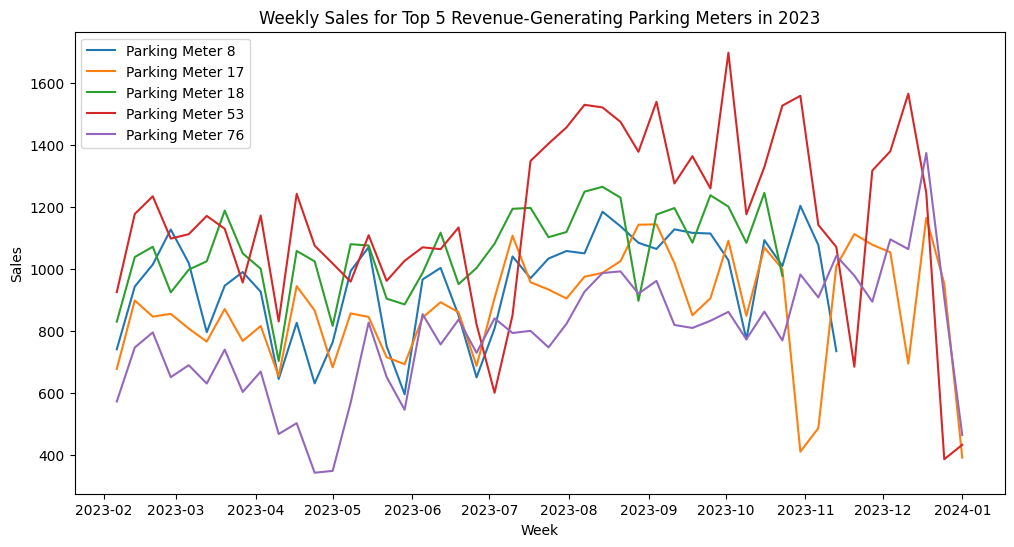

In [477]:
# Filter the data for the year 2023 and category "machine"
automaten_df_2023 = df[(df.index.year == 2023) & (df['category'] == 'machine')]

# Group the data by week and calculate the total sales for each parking meter
weekly_sales = automaten_df_2023.groupby([pd.Grouper(freq='W-MON'), 'machine_ID'])['fee'].sum().reset_index()

# Sort the parking meters by total sales in descending order
top_5_automaten = weekly_sales.groupby('machine_ID')['fee'].sum().nlargest(5).index

# Filter the data for the top 5 parking meters
top_5_sales = weekly_sales[weekly_sales['machine_ID'].isin(top_5_automaten)]

# Plot the weekly sales for the top 5 parking meters
plt.figure(figsize=(12, 6))
for machine_id, data in top_5_sales.groupby('machine_ID'):
    plt.plot(data['time'], data['fee'], label=f'Parking Meter {machine_id}')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Weekly Sales for Top 5 Revenue-Generating Parking Meters in 2023')
plt.legend()
plt.show()

#### 2.1.2 (5 Punkte)
Der Standort der Parkscheinautomaten könnte auch einen Einfluss auf deren Umsatz haben.

Machen Sie sich mit der Funktion `plot_map` aus der Bibliothek `dsplotter` vertraut. Verwenden Sie die Funktion, um den jährlichen Umsatz für jeden Automaten auf einer Karte zu visualisieren. Machen Sie die Farbe **und** den Radius der Standortmarkierung abhängig vom jährlichen Umsatz. Was haben Automaten mit einem hohen jährlichen Umsatz gemeinsam?

In [493]:
# Schritt 1: Berechnung des jährlichen Umsatzes für jeden Automaten
df_machines = df[df['category'] == 'machine']
df_machines['year'] = df_machines.index.year
annual_revenue = df_machines.groupby(['machine_ID', 'latitude_machine', 'longitude_machine', 'year'])['fee'].sum().reset_index()

# Schritt 2: Vorbereitung der Daten für die Visualisierung
total_revenue = annual_revenue.groupby(['machine_ID', 'latitude_machine', 'longitude_machine'])['fee'].sum().reset_index()
total_revenue.columns = ['machine_ID', 'latitude_machine', 'longitude_machine', 'total_fee']

# Schritt 3: Erstellung der Karte mit plot_map
dsplotter.plot_map(
    data=total_revenue,
    color_col='total_fee',
    radius_col='total_fee',
    radius_scale=15,
    alpha=0.8
)

Use column longitude_machine for the longitude coordinate.
 Use the column latitude_machine for the latitude coordinate.


/var/folders/41/npg4cjr50qqgztp8lxq5frbh0000gn/T/ipykernel_89465/2073028528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_machines['year'] = df_machines.index.year


### Aufgabe 2.2 - Analyse der Automaten- und Appnutzung pro Parkzone (27 Punkte)
Im Rahmen der Digitalisierungsinitiative der Stadt wurde die Parkster-App vor einigen Jahren als Alternative zu Parkscheinautomaten eingeführt.
Bisher wurden nur die Parkscheinautomaten in die Analyse eingeschlossen und daher einen Großteil des Ticketverkaufs, der über die App stattfand, nicht beachtet.

Die Stadt möchte für 2023 eine erste visuelle Analyse der Akzeptanz der App in den einzelnen Parkzonen durchführen und anschließend den gesamten Umsatz analysieren.

*Hinweis: Beachten Sie, dass wir die Umsätze aus der Appnutzung nur einschließen können, indem wir die Gesamtauswertung auf Ebene der Parkzonen durchführen.*

#### 2.2.1 (6 Punkte)
Bevorzugen Parkende die App- oder die Parkscheinautomatennutzung? 

Verwenden Sie einen geeigneten Plot, um die durchschnittliche Automaten- bzw. Appnutzungsrate pro **Parkzone** für das gesamte Jahr 2023 zu visualisieren. Was können Sie dem Plot entnehmen?

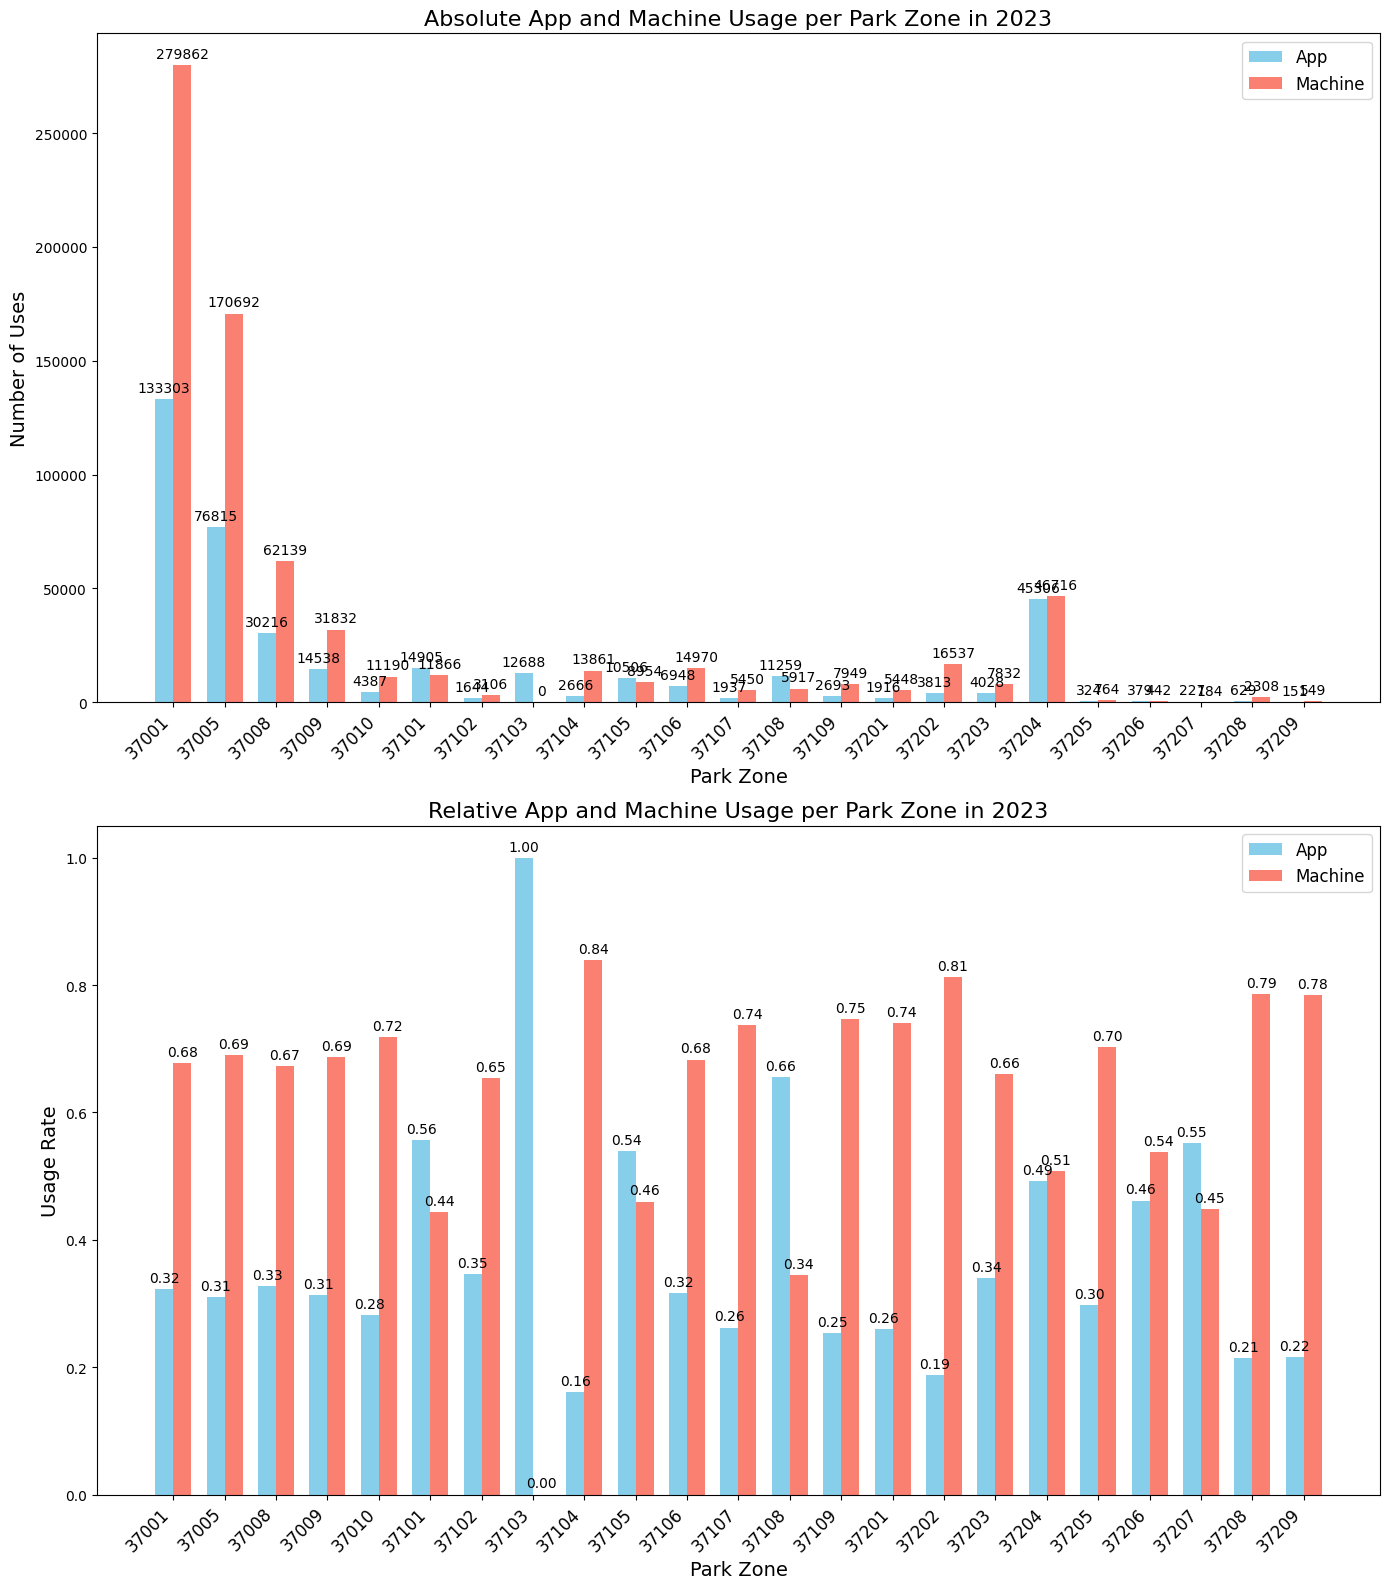

In [490]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for the year 2023
df_2023 = df[df.index.year == 2023]

# Calculate the usage rates per park zone
usage_rate = df_2023.groupby(['zone', 'category'])['fee'].count().unstack().fillna(0)
usage_rate['total'] = usage_rate.sum(axis=1)
usage_rate['app_rate'] = usage_rate['app'] / usage_rate['total']
usage_rate['machine_rate'] = usage_rate['machine'] / usage_rate['total']

# Sorting zones by zone number
usage_rate = usage_rate.sort_index()

# Plotting the absolute usage per park zone for the entire year 2023
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))
width = 0.35  # the width of the bars
indices = np.arange(len(usage_rate))

# Plotting the absolute usage
app_bars = ax1.bar(indices - width/2, usage_rate['app'], width, label='App', color='skyblue')
machine_bars = ax1.bar(indices + width/2, usage_rate['machine'], width, label='Machine', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Park Zone', fontsize=14)
ax1.set_ylabel('Number of Uses', fontsize=14)
ax1.set_title('Absolute App and Machine Usage per Park Zone in 2023', fontsize=16)
ax1.set_xticks(indices)
ax1.set_xticklabels(usage_rate.index, rotation=45, ha='right', fontsize=12)
ax1.legend(fontsize=12)

# Adding value labels to the absolute plot
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(app_bars, ax1)
add_labels(machine_bars, ax1)

# Plotting the relative usage per park zone for the entire year 2023
app_rate_bars = ax2.bar(indices - width/2, usage_rate['app_rate'], width, label='App', color='skyblue')
machine_rate_bars = ax2.bar(indices + width/2, usage_rate['machine_rate'], width, label='Machine', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_xlabel('Park Zone', fontsize=14)
ax2.set_ylabel('Usage Rate', fontsize=14)
ax2.set_title('Relative App and Machine Usage per Park Zone in 2023', fontsize=16)
ax2.set_xticks(indices)
ax2.set_xticklabels(usage_rate.index, rotation=45, ha='right', fontsize=12)
ax2.legend(fontsize=12)

# Adding value labels to the relative plot
def add_labels_relative(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels_relative(app_rate_bars, ax2)
add_labels_relative(machine_rate_bars, ax2)

plt.tight_layout()
plt.show()


#### 2.2.2 (9 Punkte)
Wie stark werden die einzelnen Parkzonen genutzt? 

Visualisieren Sie die Gesamtzahl der Verkäufe und die Automaten- bzw. Appnutzungrate für jede Parkzone im Jahr 2023 **in einem Diagramm**. Verwenden Sie für die y-Achse eine `log`-Skalierung. Was können Sie dem Plot entnehmen?

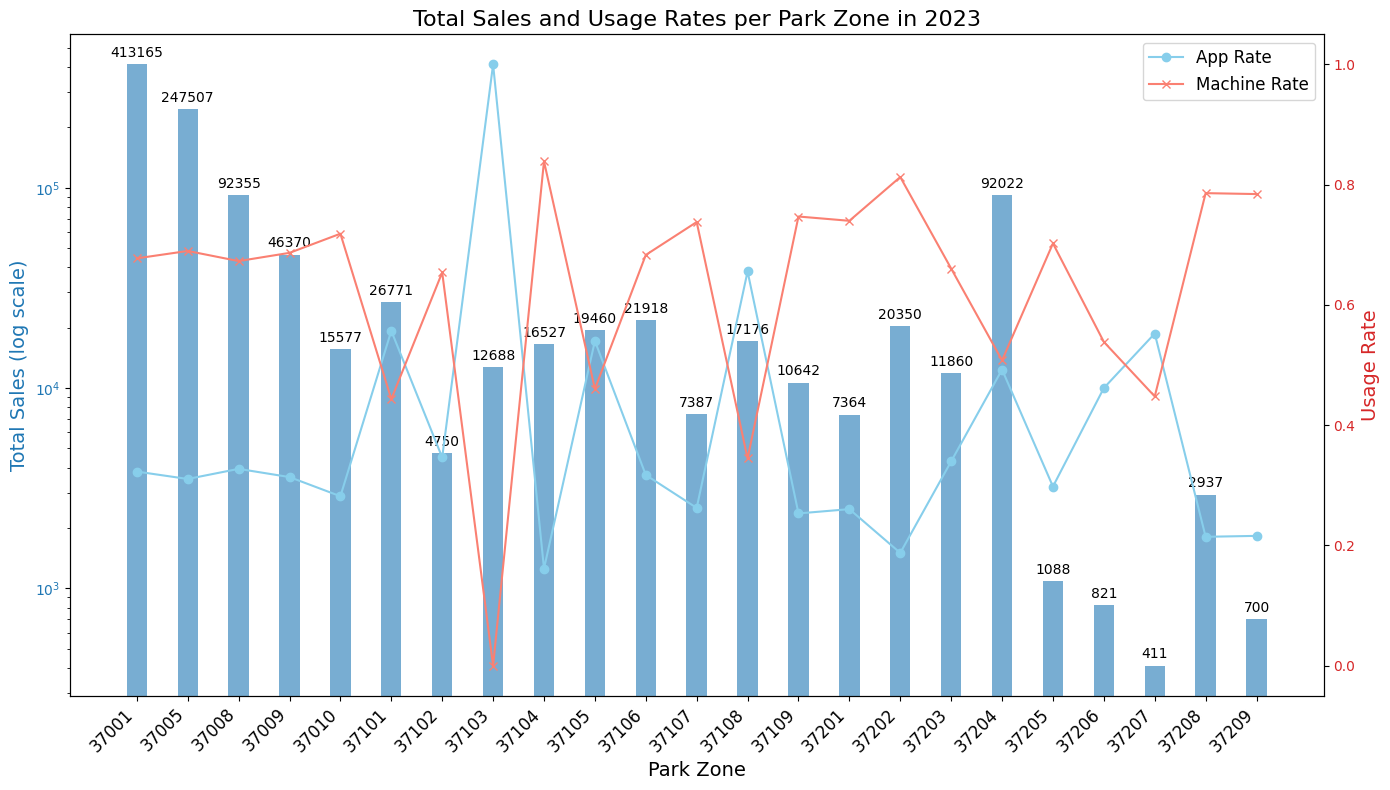

In [492]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for the year 2023
df_2023 = df[df.index.year == 2023]

# Calculate the usage rates per park zone
usage_rate = df_2023.groupby(['zone', 'category'])['fee'].count().unstack().fillna(0)
usage_rate['total'] = usage_rate.sum(axis=1)
usage_rate['app_rate'] = usage_rate['app'] / usage_rate['total']
usage_rate['machine_rate'] = usage_rate['machine'] / usage_rate['total']

# Sorting zones by zone number
usage_rate = usage_rate.sort_index()

# Plotting the total sales and usage rates per park zone for the entire year 2023
fig, ax1 = plt.subplots(figsize=(14, 8))
width = 0.4  # the width of the bars
indices = np.arange(len(usage_rate))

# Plotting the total sales with log scale
color = 'tab:blue'
ax1.set_xlabel('Park Zone', fontsize=14)
ax1.set_ylabel('Total Sales (log scale)', color=color, fontsize=14)
bars = ax1.bar(indices, usage_rate['total'], width, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

# Adding value labels to the bars
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars, ax1)

# Creating a second y-axis for the usage rates
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Usage Rate', color=color, fontsize=14)
ax2.plot(indices, usage_rate['app_rate'], color='skyblue', marker='o', label='App Rate')
ax2.plot(indices, usage_rate['machine_rate'], color='salmon', marker='x', label='Machine Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', fontsize=12)

# Adding some titles and formatting
plt.title('Total Sales and Usage Rates per Park Zone in 2023', fontsize=16)
ax1.set_xticks(indices)
ax1.set_xticklabels(usage_rate.index, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


Der Plot, der die Gesamtzahl der Verkäufe und die App- bzw. Automaten-Nutzungsrate pro Parkzone im Jahr 2023 zeigt, bietet folgende Erkenntnisse:

1. **Gesamtverkäufe (Total Sales)**:
   - Die Balken repräsentieren die Gesamtzahl der Verkäufe pro Parkzone und sind in logarithmischer Skalierung dargestellt. Dadurch werden sowohl kleine als auch große Werte gut sichtbar.
   - Einige Parkzonen haben deutlich höhere Gesamtverkäufe als andere. Dies könnte auf eine höhere Nachfrage oder eine größere Anzahl von Parkplätzen in diesen Zonen hinweisen.

2. **App-Nutzungsrate (App Rate)**:
   - Die blaue Linie mit Kreisen zeigt die relative Nutzung der App pro Parkzone.
   - In vielen Zonen liegt die App-Nutzungsrate deutlich über der Automaten-Nutzungsrate, was auf eine Präferenz der Nutzer für die App hinweist.
   - In einigen Zonen sind die Nutzungsraten der App und des Automaten nahezu gleich.

3. **Automaten-Nutzungsrate (Machine Rate)**:
   - Die rote Linie mit Kreuzen zeigt die relative Nutzung der Automaten pro Parkzone.
   - Es gibt Zonen, in denen die Automaten-Nutzungsrate höher oder gleich der App-Nutzungsrate ist, was darauf hinweist, dass in diesen Zonen die Automaten noch eine wichtige Rolle spielen.

##### Wichtige Erkenntnisse:
- **Präferenz der Zahlungsweise**: In den meisten Parkzonen scheint die App-Nutzung bevorzugt zu werden. Dies könnte auf die Bequemlichkeit und Benutzerfreundlichkeit der App hinweisen.
- **Heterogene Nutzung**: Die Nutzung der App und der Automaten variiert stark zwischen den Parkzonen. Einige Zonen weisen eine hohe Präferenz für die App auf, während in anderen Zonen die Automaten noch stark genutzt werden.
- **Verkaufsvolumen**: Zonen mit hohen Verkaufszahlen sollten genauer analysiert werden, um zu verstehen, warum sie so gut abschneiden. Diese Erkenntnisse könnten helfen, Strategien für andere Zonen zu entwickeln.

Diese Informationen sind wertvoll für die Planung und Optimierung von Parkzonen und der Zahlungsinfrastruktur. Es könnte sinnvoll sein, in Zonen mit hoher App-Nutzung die App weiter zu fördern, während in Zonen mit hoher Automaten-Nutzung die Automaten modernisiert oder zusätzlich auf App-Zahlungen hingewiesen wird.

#### 2.2.3 (7 Punkte)
Der vorherige Plot gibt uns eine Vorstellung von der Gesamtzahl der Parktickets *pro Parkzone*. Diese korreliert sehr wahrscheinlich stark mit der Anzahl der Parkplätze pro Zone. Um Parkzonen mit einer unterschiedlichen Anzahl an Parkplätzen zu vergleichen, sollten wir diese mithilfe der Anzahl der verfügbaren Parkplätze je Zone relativieren. Auf diese Weise können wir herausfinden, welche Zonen, relativ zu ihrer Größe, am häufigsten verwendet werden. Da wir nicht die Anzahl der Parkplätze für jede Zone zur Verfügung haben, können wir nur die Anzahl der Parkscheinautomaten als grobe Annäherung verwenden. 

Verwenden Sie die Informationen aus `psa_latlong.csv` und reproduzieren Sie den vorherigen mit Plot der Gesamtzahl der Verkäufe pro Automat für jede Parkzone. Verwenden Sie für die y-Achse eine `log`-Skalierung. Welche Parkzone wird am meisten genutzt?

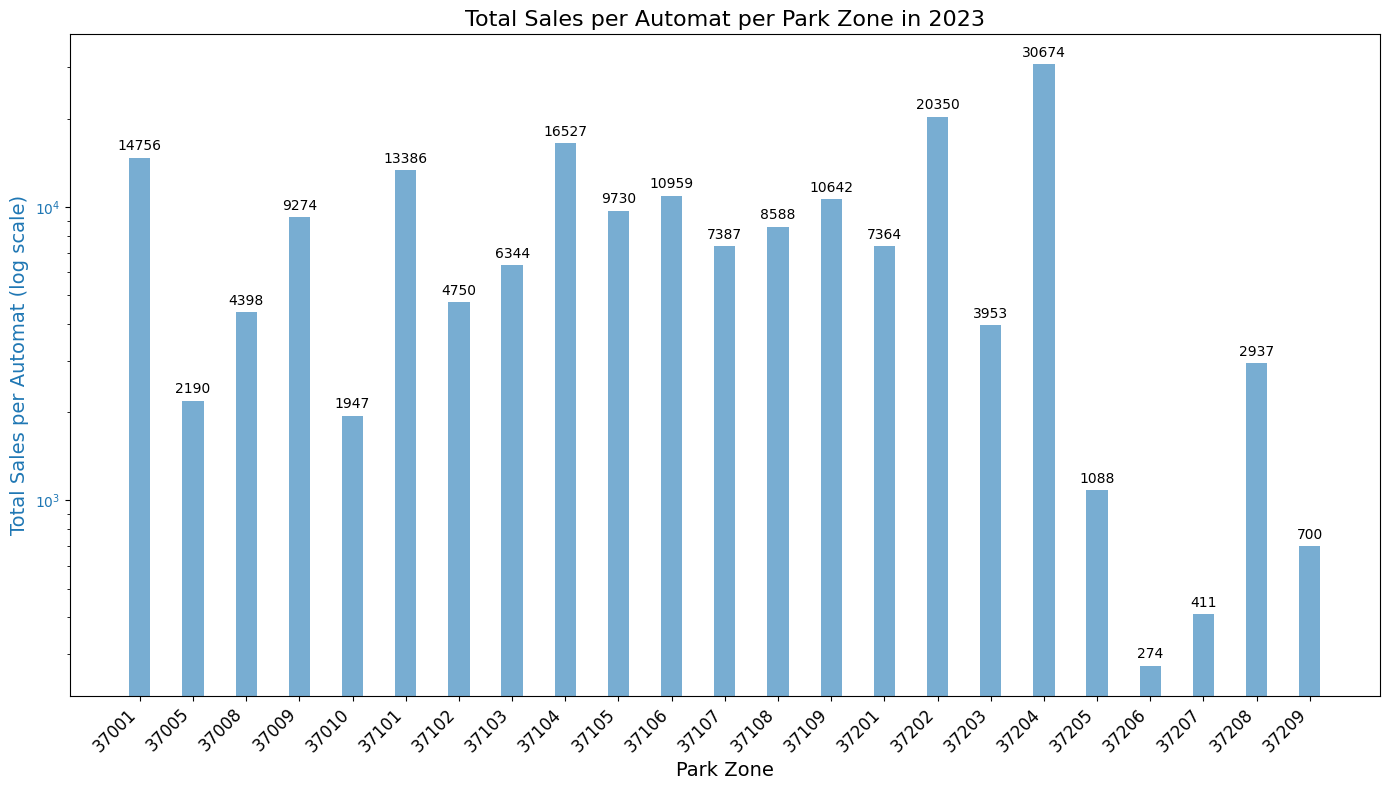

In [496]:
# Filterung der Daten für das Jahr 2023
df_2023 = df[df.index.year == 2023]

# Laden der Datei psa_latlong.csv
psa_latlong = pd.read_csv('data/psa_latlong.csv')

# Berechnung der Anzahl der Automaten pro Parkzone
automat_count_per_zone = psa_latlong['zone'].value_counts().sort_index()

# Berechnung der Gesamtverkäufe pro Parkzone
total_sales_per_zone = df_2023.groupby('zone')['fee'].count()

# Berechnung der Verkäufe pro Automat pro Parkzone
sales_per_automat = total_sales_per_zone / automat_count_per_zone

# Erstellung eines DataFrame mit den Ergebnissen
sales_per_automat_df = sales_per_automat.reset_index()
sales_per_automat_df.columns = ['zone', 'sales_per_automat']
sales_per_automat_df = sales_per_automat_df.sort_values(by='zone')

# Plotten der Ergebnisse
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.4  # die Breite der Balken
indices = np.arange(len(sales_per_automat_df))

# Plot der Verkäufe pro Automat mit logarithmischer Skalierung der y-Achse
color = 'tab:blue'
ax.set_xlabel('Park Zone', fontsize=14)
ax.set_ylabel('Total Sales per Automat (log scale)', color=color, fontsize=14)
bars = ax.bar(indices, sales_per_automat_df['sales_per_automat'], width, color=color, alpha=0.6)
ax.tick_params(axis='y', labelcolor=color)
ax.set_yscale('log')

# Hinzufügen von Wertbeschriftungen zu den Balken
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 Punkte vertikaler Abstand
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars, ax)

# Hinzufügen von Titeln und Formatierungen
plt.title('Total Sales per Automat per Park Zone in 2023', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(sales_per_automat_df['zone'], rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

#### 2.2.4 (5 Punkte)
Bisher haben wir die geografischen Informationen der Parkzonen nicht mit einbezogen. 

Verwenden Sie erneut die Funktion `plot_map`, um den Standort aller Parkzonen, ihre durchschnittlichen Tickets pro Automat und die Automaten- bzw. Appnutzungsrate zu visualieren. Färben Sie den Kartenmarker mithilfe der Automaten- bzw. Appnutzungsrate und legen Sie den Radius mit den durschnittlich verkauften Tickets pro Automat fest. Was können Sie der Darstellung entnehmen?

In [500]:
# Filterung der Daten für das Jahr 2023
df_2023 = df[df.index.year == 2023]

# Laden der Datei psa_latlong.csv
psa_latlong = pd.read_csv('data/psa_latlong.csv')

# Berechnung der Anzahl der Automaten pro Parkzone
automat_count_per_zone = psa_latlong['zone'].value_counts().sort_index()

# Berechnung der Gesamtverkäufe pro Parkzone
total_sales_per_zone = df_2023.groupby('zone')['fee'].count()

# Berechnung der Verkäufe pro Automat pro Parkzone
sales_per_automat = total_sales_per_zone / automat_count_per_zone

# Berechnung der Nutzung pro Kategorie und Parkzone
usage_rate = df_2023.groupby(['zone', 'category'])['fee'].count().unstack().fillna(0)
usage_rate['total'] = usage_rate.sum(axis=1)
usage_rate['app_rate'] = usage_rate['app'] / usage_rate['total']
usage_rate['machine_rate'] = usage_rate['machine'] / usage_rate['total']

# Kombinieren der Daten
combined_df = sales_per_automat.to_frame().join(usage_rate[['app_rate', 'machine_rate']])
combined_df.reset_index(inplace=True)
combined_df = combined_df.merge(psa_latlong.drop_duplicates('zone')[['zone', 'latitude', 'longitude']], on='zone')
combined_df.columns = ['zone', 'sales_per_automat', 'app_rate', 'machine_rate', 'latitude', 'longitude']

# Plotting the map with plot_map function
dsplotter.plot_map(
    data=combined_df,
    color_col='app_rate',  # or 'machine_rate' to color by machine usage rate
    radius_col='sales_per_automat',
    radius_scale=10,
    alpha=0.9
)

1. **Geografische Nutzungsmuster:** Die Karte zeigt die geografische Verteilung der Parkzonen und wie stark sie genutzt werden.
2. **Nutzungsraten:** Durch die Farbgebung der Marker können Sie erkennen, in welchen Zonen die App-Nutzung bzw. die Automaten-Nutzung bevorzugt wird.
3. **Durchschnittliche Verkäufe pro Automat:** Der Radius der Marker gibt Auskunft darüber, wie viele Tickets durchschnittlich pro Automat in einer Zone verkauft werden. Größere Marker deuten auf höhere Verkäufe hin.

___
## Aufgabe 3: Statistics (18 Punkte)


#### Aufgabe 3.1 - t-Test (13 Punkte)
Zusätzlich zu der visuellen Analyse möchte die Stadt nun auch eine statistische Untersuchung der Verwendung von Parkscheinautomaten und Apps durchführen.

Bestimmen Sie dazu zunächst die Automaten- bzw. Appnutzungsrate pro Parkzone für jeden Kalendertag. Führen Sie anschließend für **jede Parkzone** einen t-Test durch, der testet, ob Parkende es vorziehen die App in der jeweiligen Zone zu verwenden. Schreiben Sie das entsprechende Hypothesenpaar auf, führen Sie den Test durch und interpretieren Sie Ihre Testergebnisse. Verwenden Sie für Ihre Testentscheidung ein Signifikanzniveau von 0.05. Welche grundlegende Annahme von statistischen Tests könnte bei diesem Vorgehen verletzt werden?

In [506]:
#Schritt 1: Berechnung der Nutzungsrate pro Kalendertag und Parkzone

# Filterung der Daten für das Jahr 2023
df_2023 = df[df.index.year == 2023]

# Berechnung der täglichen Nutzungsrate pro Parkzone
daily_usage = df_2023.groupby([df_2023.index.date, 'zone', 'category'])['fee'].count().unstack().fillna(0)
daily_usage['total'] = daily_usage.sum(axis=1)
daily_usage['app_rate'] = daily_usage['app'] / daily_usage['total']
daily_usage['machine_rate'] = daily_usage['machine'] / daily_usage['total']
daily_usage.reset_index(inplace=True)


In [507]:
# Schritt 2: Durchführung des t-Tests für jede Parkzone

# Liste der Zonen
zones = daily_usage['zone'].unique()

# Hypothesenpaar
# H0: Die durchschnittliche Nutzungsrate der App ist gleich der der Automaten (keine Präferenz)
# H1: Die durchschnittliche Nutzungsrate der App ist ungleich der der Automaten (es gibt eine Präferenz)

t_test_results = []

for zone in zones:
    zone_data = daily_usage[daily_usage['zone'] == zone]
    app_rate = zone_data['app_rate']
    machine_rate = zone_data['machine_rate']
    
    t_stat, p_value = ttest_ind(app_rate, machine_rate)
    
    t_test_results.append({
        'zone': zone,
        't_stat': t_stat,
        'p_value': p_value,
        'reject_null': p_value < 0.05
    })

t_test_results_df = pd.DataFrame(t_test_results)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [509]:
# Schritt 3: Interpretation der Ergebnisse

# Ausgabe der Ergebnisse des t-Tests
t_test_results_df

,zone,t_stat,p_value,reject_null
0,37001,-33.192601,1.839809e-143,True
1,37005,-30.110840,1.672969e-126,True
2,37008,-29.216767,3.500666e-121,True
3,37105,9.506658,3.672015e-20,True
4,37204,3.043581,2.429878e-03,True
5,37009,-19.874954,6.537791e-69,True
6,37010,-27.038423,1.450015e-108,True
7,37101,14.207356,4.462713e-40,True
8,37102,-11.951403,9.570176e-30,True
9,37103,inf,0.000000e+00,True


##### Interpretation
Für jede Zone, für die die Nullhypothese abgelehnt wird (reject_null == True), kann gefolgert werden, dass es eine Präferenz für die App-Nutzung oder Automaten-Nutzung gibt.


#### Aufgabe 3.2 - Statistisches Verständnis (5 Punkte)
Angenommen, für die Zone `37106` beträgt die durchschnittliche Automaten- bzw. Appnutzungsrate `0.5`.
Die Stadt sendet Ihnen die Daten für 2024. 

An wie vielen Tagen können Sie erwarten, dass die Appnutzung signifikant höher ist, wenn Sie weiterhin von einem Signifikanzniveau von `0.05` ausgehen? Erklären Sie, warum dies der Fall ist. Nehmen Sie an, dass sich das Verhalten der Parkenden im Vergleich zu 2023 nicht geändert hat.

___
## Aufgabe 4: Machine Learning (20 Punkte)

Nutzen Sie ein K-Nearest-Neighbors (KNN) Modell, um die Automaten- bzw. Appnutzungsrate mithilfe des Standortes (`latitude`, `longitude`) und der Parkgebühr (`fee`) vorherzusagen. Verwenden Sie ausschließlich Datenreihen mit Parkgebühren zwischen 2 Euro und 7 Euro.

#### Aufgabe 4.1 - Modell-Training and Hyperparameter-Suche (10 Punkte)
Bereiten Sie die Daten sinnvoll auf, führen Sie eine Hyperparameter-Suche nach optimalem K-Wert aus, visualisieren Sie die Ergebnisse der Hyperparameter-Suche und verwenden Sie schließlich Ihren optimalen K-Wert, um das Modell zu trainieren.

*Hinweis: Verwenden Sie 30% aller Daten zur Bestimmung des optimalen K-Wertes, um die Hyperparameter-Suche zu beschleunigen, und den gesamten Datensatz für das Modell-Training.*


#### Aufgabe 4.2 - Visualisierung der Modell-Vorhersage (10 Punkte)
Erstellen Sie ein `100 x 100` Grid aus Längen-/Breitengradwerten unter Verwendung der minimalen und maximalen Werte in Ihrem Datensatz. Visualisieren Sie die Vorhersagen des KNN-Modells **für drei verschiedene Parkgebühren** - 3, 5 und 7 Euro. Verwenden Sie dazu die Funktion `plot_map`. Färben Sie den Marker entsprechend der Modell-Vorhersage. Beschreiben Sie mindestens 2 visuelle Veränderungen des vorhergesagten Nutzungsmusters auf der Karte.